In [3]:
import torch
import torchvision.datasets as dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import torch.optim as optim
import torch.nn.functional as F

- 이미지를 사용하기 위해서 torch.vision을 사용

In [4]:
use_cuda = torch.cuda.is_available()
print(use_cuda)
device = torch.device("cuda" if use_cuda else 'cpu')
print(device)

False
cpu


In [6]:
random.seed(777) # torch.manul_seed(777) 랑 동일
if device == 'cuda':
    torch.cuda.manual_seed(777)

In [7]:
epochs = 15
batch_size = 100 # 한번에 사용할 데이터의 크기


In [8]:
mnist_train = dataset.MNIST(root="data/MNIST_data", # 데이터 저장 위치
                            train=True, # train data로 지정
                            transform=transforms.ToTensor(), # array -> torchTensor로 변환
                            download=True)

mnist_test = dataset.MNIST(root="data/MNIST_data", # 데이터 저장 위치
                            train=False, # test data로 지정
                            transform=transforms.ToTensor(), # array -> torchTensor로 변환
                            download=True)

In [24]:
# 데이터 확인
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/MNIST_data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data/MNIST_data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [47]:
# 가지고 온 datasets의 이미지 확인하기
import numpy as np
def plot(x, y):
    for i in range(len(x)):
        plt.subplot(5, 5, i+1)
        plt.title(y[i])
        # img = np.array(x.detach(), dtype="float").reshape(28, 28)
        img = np.array(x[i]).reshape(28, 28)
        # plt.figure(figsize=(1,2))
        plt.imshow(img, cmap="gray")
        plt.axis("off")
    plt.show()

c:\Users\yang\anaconda3\Lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1])


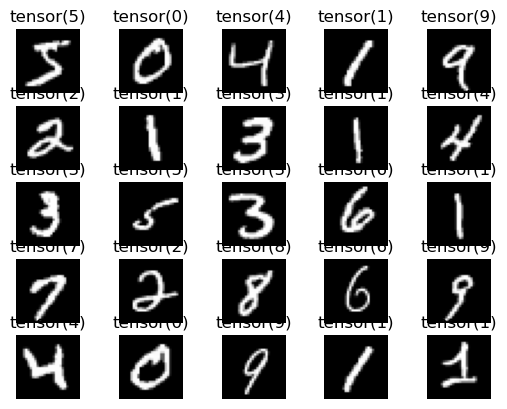

In [50]:
# print(mnist_train.data[0])
print(mnist_train.train_labels[:25])
plot(mnist_train.data[:25], mnist_train.train_labels[:25])

In [9]:
data_loader = DataLoader(dataset=mnist_train, # 로드할 데이터셋
                         batch_size=batch_size, # 한번에 로드할 데이터셋의 size
                         shuffle=True, # 데이터를 섞어서 가져옴
                         drop_last=True) 
data_loader

In [10]:
# 1번에 가져 가지고 오는 데이터 확인하기
for X, Y in data_loader:
    print(X.size(), Y.size(), Y[0])
    break

torch.Size([100, 1, 28, 28]) torch.Size([100]) tensor(9)


- 손실함수를 구할때 crit = nn.CrossEntropyLoss() 를 사용할 경우
- model의 마지막의 LogSoftmax()를 생략해도 된다.

In [14]:
model = nn.Sequential(
    nn.Linear(784, 500, bias=True),
    nn.LeakyReLU(),
    nn.Linear(500, 400, bias=True),
    nn.LeakyReLU(),
    nn.Linear(400, 300, bias=True),
    nn.LeakyReLU(),
    nn.Linear(300, 200, bias=True),
    nn.LeakyReLU(),
    nn.Linear(200, 100, bias=True),
    nn.LeakyReLU(),
    nn.Linear(100, 10, bias=True)
    # nn.LogSoftmax(dim=1)
    # 마지막에 sofemax를 생략할 수도 있다. 위 부분에 확인하기
)
model

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=500, out_features=400, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=400, out_features=300, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=300, out_features=200, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=200, out_features=100, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=100, out_features=10, bias=True)
)

In [15]:
crit = nn.CrossEntropyLoss()
#crit = nn.NILLLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.1)
optimizer = optim.Adam(model.parameters()) # Adam : learing rate를 자동으로 정한다. 만약에 주면 초기값으로 간주

In [16]:
for epoch in range(epochs):
    avg_cost = 0
    for X, Y in data_loader:
        X = X.view(-1, 28*28) # x, y의 크기 : [100, 1, 28, 28](=> 일렬로 변화는 크기 = [100, 768]) , [100]
        y_hat = model(X)
        cost = crit(y_hat, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost.item()
    avg_cost = avg_cost/100 # 100 : batch_size 의 크기
    print("Epoch : {} Cost : {}".format(epoch, avg_cost))

        

Epoch : 0 Cost : 1.884552648961544
Epoch : 1 Cost : 0.6535613793507218
Epoch : 2 Cost : 0.4620440351474099
Epoch : 3 Cost : 0.3550844542705454
Epoch : 4 Cost : 0.2873903775820509
Epoch : 5 Cost : 0.2525280497377389
Epoch : 6 Cost : 0.20241755149909296
Epoch : 7 Cost : 0.1714942536962917
Epoch : 8 Cost : 0.15829805354995188
Epoch : 9 Cost : 0.13446418512496167
Epoch : 10 Cost : 0.11986599164476502
Epoch : 11 Cost : 0.11262882548973721
Epoch : 12 Cost : 0.11211517450981773
Epoch : 13 Cost : 0.0951227330861002
Epoch : 14 Cost : 0.08545627114688614


In [19]:
print(mnist_test)
print(mnist_train)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/MNIST_data
    Split: Test
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 60000
    Root location: data/MNIST_data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [56]:
with torch.no_grad(): # no_grad() : 훈련과정 중에 미분 작업을 그만하라는 명령
    # mnist_test.test_data : x 데이타 
    x_test = mnist_test.test_data.view(-1, 28*28).float() # view(-1, 28*28) : [10000, 1, 28, 28] : 데이터 모양
    y_test = mnist_test.test_labels
    predict = model(x_test).argmax(dim=1)
    accuracy = (predict == y_test).sum() / len(predict)
    print(accuracy)
    print(predict[:5])
    print(y_test[:5])


tensor(0.9778)
tensor([7, 2, 1, 0, 4])
tensor([7, 2, 1, 0, 4])


In [57]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [60]:
# 1이 1이 아닌경우를 표시
pd.DataFrame(confusion_matrix(y_test, predict), index=('true_%d'%i for i in range(10)),
             columns=["predict_%d"%i for i in range(10)])

,predict_0,predict_1,predict_2,predict_3,predict_4,predict_5,predict_6,predict_7,predict_8,predict_9
true_0,970,0,4,0,1,1,2,1,1,0
true_1,0,1130,0,1,0,1,2,1,0,0
true_2,0,7,1014,3,1,0,1,4,2,0
true_3,0,0,3,994,0,4,0,3,2,4
true_4,2,0,2,0,952,0,5,3,0,18
true_5,2,0,0,12,1,871,1,1,0,4
true_6,1,2,0,1,4,2,948,0,0,0
true_7,0,4,7,3,1,0,0,1007,2,4
true_8,6,7,6,19,4,7,2,4,909,10
true_9,0,4,0,6,8,2,1,5,0,983
